In [1]:
import pandas as pd

Vispirms ir jāimportē bibliotēka, ar kuru strādāsim - `pandas`. Ir pieņemts, ka to saīsina uz `pd`

Importēsim gruntsūdens līmeņu datus no faila `gw.csv`. Vērts pievērst uzmanību, ka katrai kolonnai ir nosaukums, un ir jānorāda, kurā kolonnā ir datumi - kāds ir šīs kolonnas nosaukums un ka indeksēšana arī tiek veikta pēc šīs pašas kolonnas.


In [2]:
gw=pd.read_csv("gw.csv",dayfirst=True,index_col=0,parse_dates=['date'])

Aplūkosim ieimportēto datu masīvu.

In [3]:
gw.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5461 entries, 1979-01-15 to 1993-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   level   5461 non-null   float64
dtypes: float64(1)
memory usage: 85.3 KB


Varam redzēt, ka pirmais mērījums ir 1979. gada 15. janvārī un pēdējais - 1993.gada 27.decembrī. Un datu masīvā ir tikai viena vienīga kolonna - līmenis.

Aplūkosim pašus datus.

In [4]:
gw


,level
date,
1979-01-15,1.930000
1979-01-16,1.931667
1979-01-17,1.933333
1979-01-18,1.935000
1979-01-19,1.936667
...,...
1993-12-23,1.147143
1993-12-24,1.142857
1993-12-25,1.138571


Būtu interesanti attēlot grafiski, kā gruntsūdens līmenis ir mainījies laika gaitā. `pandas` ļauj automātiski vizualizēt šo informāciju.

<AxesSubplot: xlabel='date'>

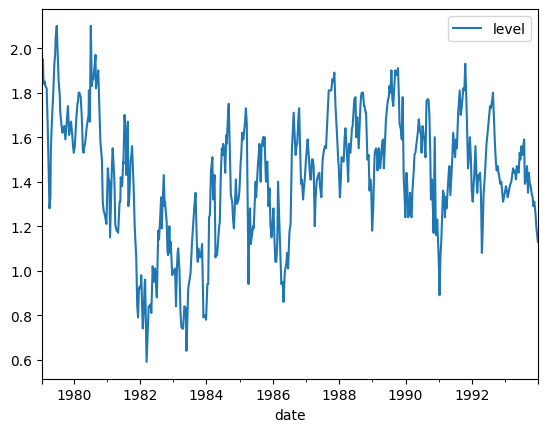

In [5]:
gw.plot()

Datos ir vērojama sezonalitāte (kas arī ir diezgan loģiski - pavasarī gruntsūdens līmeņi pieaug, ziemā un vasaras beigās krītas)

Gruntsūdens līmenis ir atkarīgs no meteoroloģiskajiem apstākļiem. Būtu vērts apskatīt šos datus vienlaicīgi ar meteodatiem. Tāpēc importēsim failu `meteo.csv`, kurā iekšā esot meteodati.

In [6]:
meteo=pd.read_csv("meteo.csv",dayfirst=False,index_col=0,parse_dates=['date'])


In [7]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15706 entries, 1966-01-01 to 2008-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    15706 non-null  float64
 1   prec    15706 non-null  float64
 2   hum     15644 non-null  float64
dtypes: float64(3)
memory usage: 490.8 KB


Apskatot šī datu masīva informāciju, var redzēt, ka šeit ir kopumā četras kolonnas, kur pirmajā ir datumi, pārējās - meteoroloģisko novērojumu dati un tie aptver lielāku laika periodu, nekā gruntsūdens līmeņa dati

In [8]:
meteo


,temp,prec,hum
date,,,
1966-01-01,-8.6,4.0,74.0
1966-01-02,-4.7,7.3,88.0
1966-01-03,-3.4,2.3,91.0
1966-01-04,-8.9,0.5,76.0
1966-01-05,-13.4,0.0,77.0
...,...,...,...
2008-12-27,2.0,0.0,92.0
2008-12-28,-3.2,0.0,96.0
2008-12-29,0.8,0.0,91.0


<AxesSubplot: xlabel='date'>

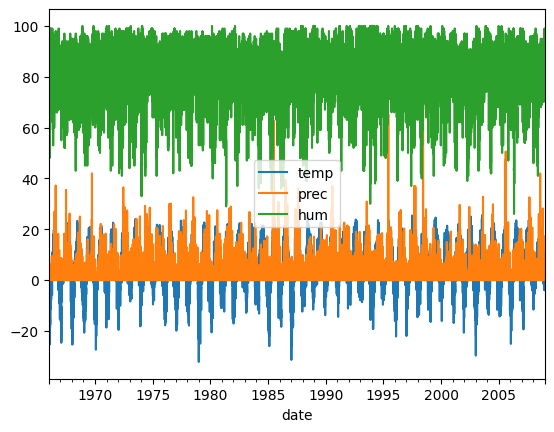

In [9]:
meteo.plot()

Vizualzējot šos datus vienlaicīgi, var redzēt, ka ir liels datu "bardaks" - informācija pārklājas. Varbūt var atdalīt, katru no meteorolģiskajiem parametriem savā grafikā?

`meteo` ir datu masīvs, kuram mēs varam norādīt arī tikai dažas no kolonnām, kuras vēlamies attēlot. Jāzina tikai to nosaukumi. Te, piemērā, pirmajā rindiņā tiek norādīti visu trīs kolonnu nosaukumi.

Otrajā rindiņā tiek veikta pati zīmēšana. `meteo` masīvam norāda, kuras kolonnas zīmēt, savukārt komandā `plot` tiek norādītas dažādas detaļas, kādam vajadzētu izskatīties katram grafikam.

Pirmkārt to, ka tiks veidoti atsevišķi grafiki, norāda parametrs `subplots = True`.

Otrkārt, `figsize` norāda izmēru, kāds būs "pamatnei", kur tiks zīmēti visi trīs grafiki. 

Treškārt, parametrs `alpha` ir noderīgs, ja datu punkti ir ļoti tuvi viens otram un pārklājas. Var vizuāli uztvert datu punktu blīvumu.

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>], dtype=object)

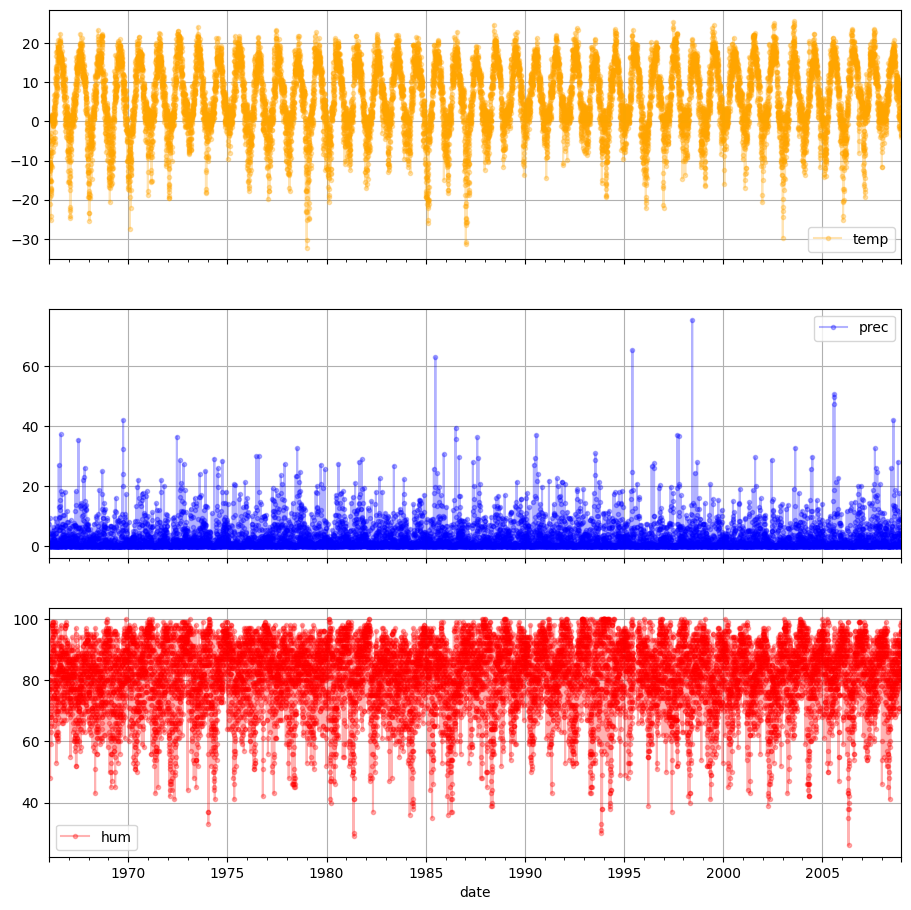

In [38]:
cols=["temp","prec","hum"]
meteo[cols].plot(marker=".", alpha=0.3, color=["orange","blue","red"], 
                          linestyle=None, figsize=(11,11),subplots=True, grid=True)


###Apvienosim abus datu masīvus - pie lielā `meteo` pievienosim īso `gw` masīvu.

Pie tam ir ļoti svarīgi izvērtēt, kā veikt pievienošanu. Šajā gadījumā `how="inner"` apvienos abus datu masīvus tā, ka jaunajā masīvā būs tikai tie datumi un vērtības, kurās mērījumi eksistē gan gruntsūdens līmeņiem masīvā `gw`, gan visiem trim klimata parametriem masīvā `meteo`

In [39]:
df=meteo.join(gw, how="inner")

In [40]:
df


,temp,prec,hum,level
date,,,,
1979-01-15,-1.7,0.2,83.0,1.930000
1979-01-16,-7.9,0.0,85.0,1.931667
1979-01-17,-7.8,0.0,82.0,1.933333
1979-01-18,-9.8,0.2,82.0,1.935000
1979-01-19,-12.8,0.0,83.0,1.936667
...,...,...,...,...
1993-12-23,-0.6,0.3,94.0,1.147143
1993-12-24,0.4,2.5,99.0,1.142857
1993-12-25,-1.5,0.0,95.0,1.138571


Aplūkojot apvienotā datu masīva ierakstu (rindu) skaitu, tas sakrīt ar ierakstu skaitu gruntsūdens līmeņu masīvam. Tas nozīmē, ka katram gruntsūdens līmeņu novērojumam būs attiecīgs meteoroloģisko datu novērojums.

Tā kā iepriekš esam apguvuši attēlot grafikus, tad arī tagad varam aplūkot, kā izskatās visu četru novērojumu laikrindas attiecīgi viena pret otru.

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

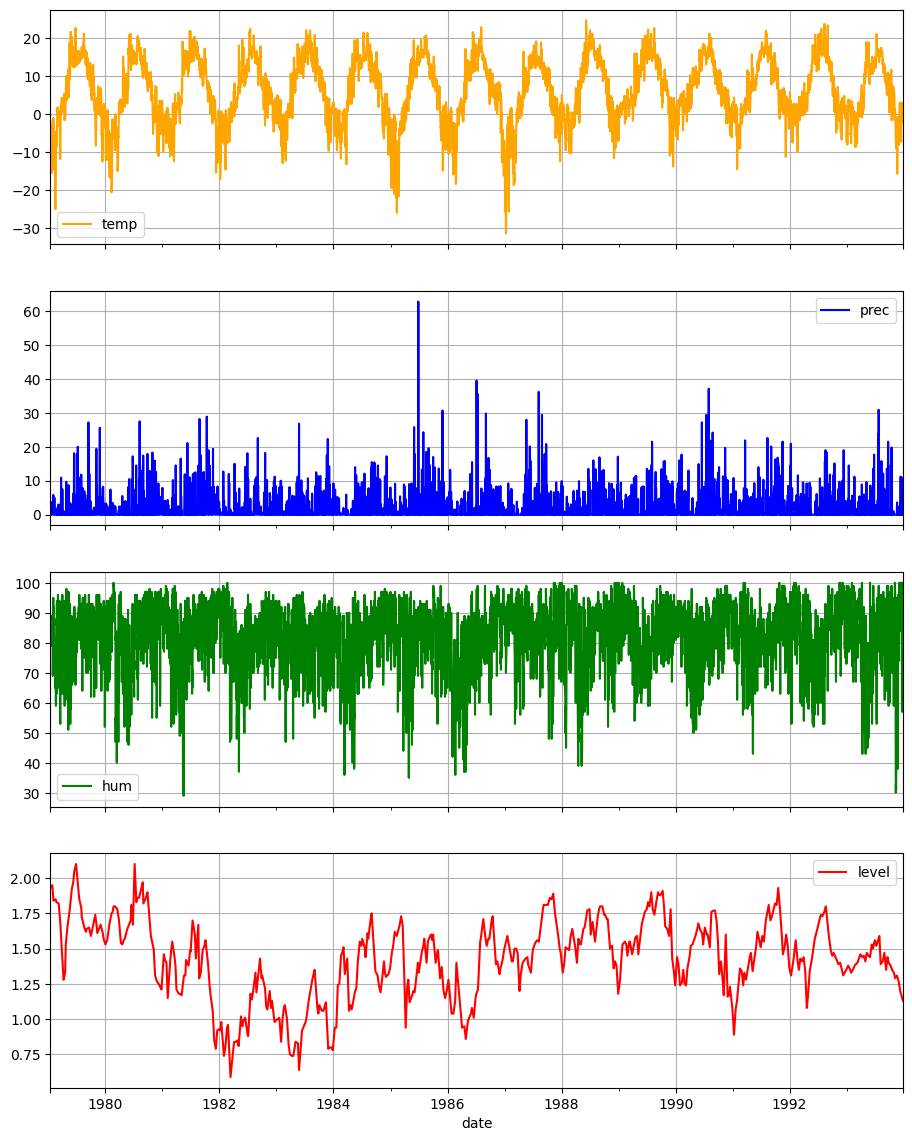

In [43]:
df.plot(subplots=True,figsize=(11,14),grid=True, color=["orange","blue","green","red"])

### Lokālu datu attēlošana

Mēs varam izvēlēties vizualizēt attiecīgu laika periodu no visa kopējā perioda. Tā, piemēram, šeit attēlošanai tiek izvēlēts gads `1984` un tikai gruntsūdens līmenis `level` un temperatūra `temp`. Attēlošanas komandas `plot` parametri mums ir jau pazīstami. Var redzēt, ka attēlošanas brīdī, ja tiek norādītas vairāk krāsas, nekā datu masīvs, tiek izmantotas pirmās divas krāsas (pie tam, norādot tikai vienu krāsu, visi grafiki būs vienā krāsā)

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

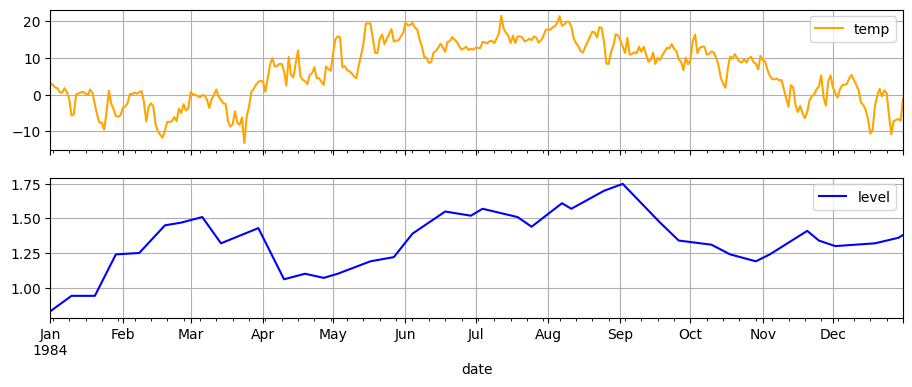

In [46]:
df.loc['1984',['temp','level']].plot(subplots=True, figsize=(11,4),grid=True, color=["orange","blue","red"])

Vērts pieminēt par datu interpretāciju. Ja par temperatūru vēl viss ir skaidrs, tad gruntsūdens līmeņa izmaiņas jāinterpretē šādi - augstāka tā vērtība, dziļāk zem zemes tas atrodas. Būtu vērts samainīt y ass virzienu otrajam grafikam. Par to citreiz.

Tabulas veidā redzēt visa gada datus var attēlot šādi, izmantojot `loc` funkciju un norādot izvēlēto gadu.

In [93]:
Y=df.loc['1984']
Y

,temp,prec,hum,level
date,,,,
1984-01-01,3.2,9.2,86.0,0.829231
1984-01-02,2.7,1.7,80.0,0.841538
1984-01-03,2.0,8.2,84.0,0.853846
1984-01-04,1.8,5.1,80.0,0.866154
1984-01-05,0.6,0.0,65.0,0.878462
...,...,...,...,...
1984-12-27,-7.2,0.3,84.0,1.352000
1984-12-28,-6.9,0.2,83.0,1.356000
1984-12-29,-6.6,1.4,86.0,1.360000


### Laikrindas papildus funkcijas. 

Mēs varam pievienot katram ierakstam vēl papildus parametru - mēnesi, tādā veidā kategorizējot šos datus - kuram gada mēnesim šie dati pieder. Tādējādi atvieglojot aprakstošās statistikas veidošanu pa mēnešiem

In [49]:
Y['Month']=Y.index.month
Y

,temp,prec,hum,level,Month
date,,,,,
1984-01-01,3.2,9.2,86.0,0.829231,1
1984-01-02,2.7,1.7,80.0,0.841538,1
1984-01-03,2.0,8.2,84.0,0.853846,1
1984-01-04,1.8,5.1,80.0,0.866154,1
1984-01-05,0.6,0.0,65.0,0.878462,1
...,...,...,...,...,...
1984-12-27,-7.2,0.3,84.0,1.352000,12
1984-12-28,-6.9,0.2,83.0,1.356000,12
1984-12-29,-6.6,1.4,86.0,1.360000,12


### Seaborn grafiki pa mēnešiem

Attēlosim izvēlētā 1984.gada temperatūru grafiski pa mēnešiem katram mēnesim izmantojot boxplot aprakstošās statistikas datus temperatūrai

In [23]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns


<AxesSubplot: xlabel='Month', ylabel='temp'>

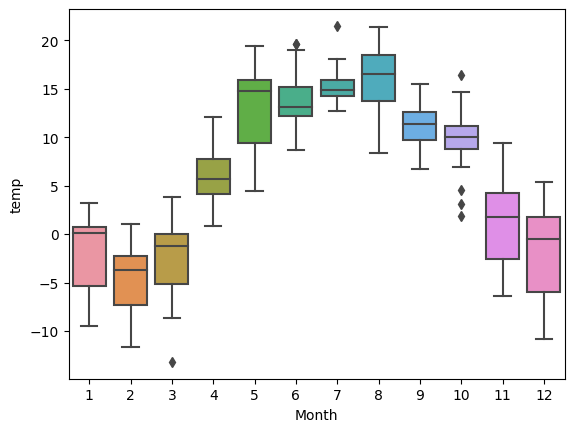

In [55]:
sns.boxplot(data=Y, x='Month', y="temp")

Augšējā attēlā var redzēt pa X asi 1984.gada mēnesi un attiecīgo aprakstošo statistiku boxplotā.


Var mēģināt arī divus boxplotus apvienot vienā grafikā. Pirmkārt gan ir jāsaprot, vai tas ir prātīgi.

Šajā piemērā tas būs neprātīgi, bet parādīt, ka tā var - Tas gan ir nedaudz sarežģītāk un prasa izmantot `matplotlib.pyplot` bibliotēku izmantot mazliet citādākā veidā - secīgi.

Pirmkārt izveidosim pirmā grafika asis `ax1` un veidojot seaborn `boxplot` norādīsim, uz kura grafika asīm to zīmēt - `ax=ax1`

Otrkārt izveidosim otrā grafika asis `ax2` un norādīsim, ka tām ir kopīga X ass no pirmā grafika `ax1`un veidojot seaborn `boxplot` otrai datu kopai norādīsim, ka tas jāveido uz šī otrā grafika asīm - boxplota `ax=ax2`

Papildus varam norādīt y ass diapazonu.

Visbeidzot izsaucam `pyplot` komandu izveidoto un nokonfigurēto grafiku zīmēt.

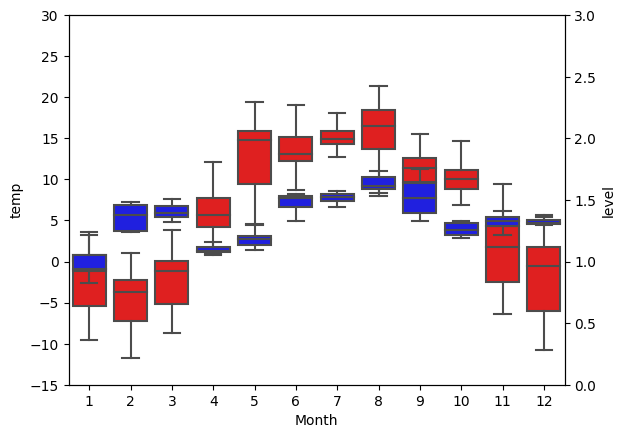

In [60]:
ax1 = plt.subplot()
sns.boxplot(x="Month", y="temp", data=Y, color="red", showfliers=False, ax=ax1)


ax2 = ax1.twinx()
sns.boxplot(x="Month", y="level", data=Y, color="blue", showfliers=False, ax=ax2)

ax1.set_ylim(-15, 30)
ax2.set_ylim(0,3)


# Show the plot
plt.show()

Prātīgāk ir šādus datus zīmēt atsevišķi, vienu zem otra, piemēram.

Arī šeit vislabāk ir sagatavot katru grafiku atsevišķi un visbeidzot izsaukt `matplotlib` grafika zīmēšanas komandu.

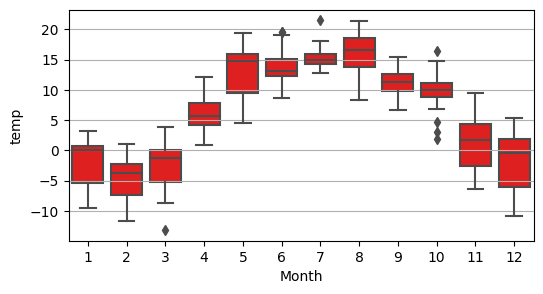

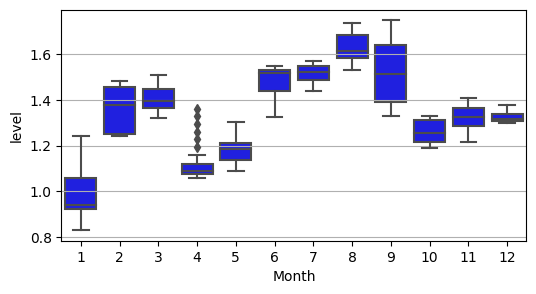

In [71]:
# Create the first figure and plot the second dataset's boxplot using seaborn
fig1, ax1 = plt.subplots(figsize=(6,3))
ax1.grid(True)
sns.boxplot(x="Month", y="temp", data=Y, color="red", ax=ax1)

# Create the second figure and plot the second dataset's boxplot using seaborn
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2.grid(True)
sns.boxplot(x="Month", y="level", data=Y, color="blue", ax=ax2)

# Show both plots
plt.show()

<AxesSubplot: xlabel='Month', ylabel='prec'>

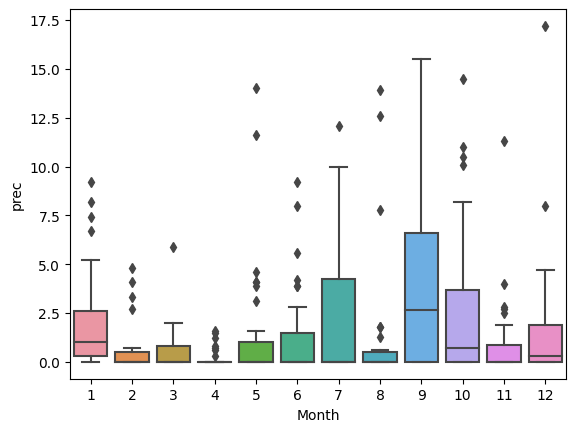

In [21]:
sns.boxplot(data=T, x='Month', y="prec")

Ir dažādas krāsu shēmas, kādas izmanto `seaborn`. Piemēram - 
1) pastel
2) deep
3) bright
4) dark
5) colorblind
6) muted
7) husl
8) RdYlGn
9) RdBu
10) matplotlib


<AxesSubplot: xlabel='Month', ylabel='prec'>

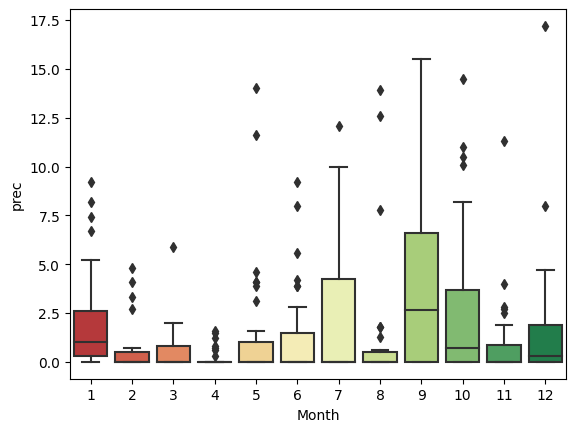

In [80]:
sns.boxplot(data=T, x='Month', y="prec", palette="RdYlGn")

### Slīdošās vidējās vērtības.

Izmantojot laikrindas funkciju `rolling` var atrast slīdošo vidējo vērtību. Kā var redzēt, var izvēlēties, kur atradīsies "centrs" un slīdošā "loga" lielums.

Šajā piemērā slīdošā loga lielums ir 5 dienas.

<AxesSubplot: xlabel='date'>

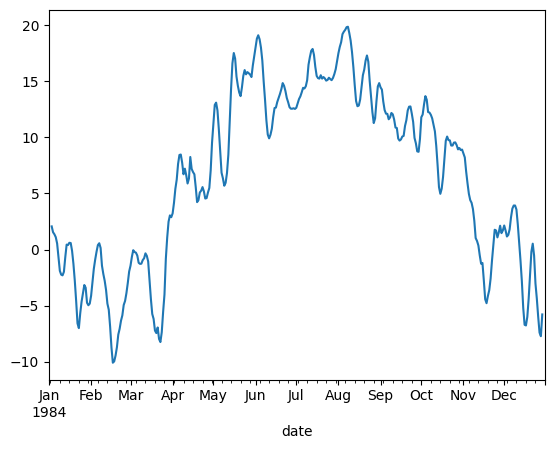

In [91]:
T1=Y["temp"].rolling(5,center=True).mean()
T1.plot()

Mazliet sarežģītāka problēma - 
Atrast tādus brīžus gadā, kad temperatūra parādās vismaz +5 grādus pēc Celsija vairākas dienas pēc kārtas.

Pirmais uzdevums - izveidot papildus kolonnu, kurā reģistrēt, vai temperatūra ir lielāka `true` vai mazāka `false`  par 5 grādiem.

Otrais uzdevums - atrast veidu, kā šo loģiku skaitīt. Pirmais piegājiens, varbūt mēģināt pēc biežuma. `mode` aprakstošajā statistikā ir mērs, kurš parāda visbiežāk esošo vērtību. 

Tātad - varētu šādā slīdošā logā meklēt visbiežāk esošo vērtību izvēlētā loga izmērā slīdot pāri jaunizveidotajai kolonnai un atgriezt vēl vienu loģisko vērtību, kas parāda - kas šo dienu ietvaros ir biežāk - virs vai zem šiem pieciem grādiem.

Trešajā rindiņā logam slīdot pār datiem, tiek piemērota `lambda` funkcija, kas atgriež modas vērtību kolonnā `duration`.


In [102]:
from scipy.stats import mode
Y[">5"]=Y["temp"].gt(5)
Y["duration"]=Y[">5"].rolling(5,center=True).apply(lambda x: mode(x)[0])

Y.loc["1984-04"]

C:\Users\didzis\AppData\Local\Temp\ipykernel_20684\76891576.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y["duration"]=Y[">5"].rolling(5,center=True).apply(lambda x: mode(x)[0])


,temp,prec,hum,level,>5,duration
date,,,,,,
1984-04-01,3.6,0.8,80.0,1.362727,False,0.0
1984-04-02,0.8,1.2,75.0,1.329091,False,0.0
1984-04-03,4.4,0.3,74.0,1.295455,False,0.0
1984-04-04,8.2,0.6,67.0,1.261818,True,1.0
1984-04-05,10.0,0.0,60.0,1.228182,True,1.0
1984-04-06,7.7,0.0,64.0,1.194545,True,1.0
1984-04-07,7.8,0.0,70.0,1.160909,True,1.0
1984-04-08,8.4,0.0,68.0,1.127273,True,1.0
1984-04-09,8.4,0.0,64.0,1.093636,True,1.0


<AxesSubplot: xlabel='date'>

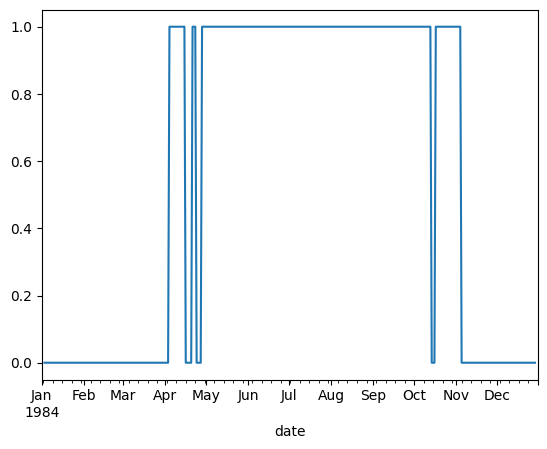

In [27]:
T["duration"].astype(float).plot()

Bet, kad papēta datus, tad var redzēt, ka šāds paņēmiens īsti neparāda brīdi, kad temperatūra piecas dienas pēc kārtas pārsniegs +5 grādu temperatūru. 
Par to, kā to dabūt gatavu - citreiz.